# Artificial Intelligence (CS6364-002) 
## Homework 3 - Question 5
## Submission by - Adithya Sundararajan Iyer (asi200000)


In [1]:
!pip install idx2numpy

# importing the libraries
import pandas as pd
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
from torch.autograd import Variable
from torch import nn, optim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=4740d58bec07c4d5a4b22a13ac33703fdba28794117e263acf492a1b8b4022bd
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [2]:
#Loading the data set
train = 'train-images-idx3-ubyte'
xTrain = idx2numpy.convert_from_file(train)
train_labels = 'train-labels-idx1-ubyte'
yTrain = idx2numpy.convert_from_file(train_labels)
test = 't10k-images-idx3-ubyte'
xTest = idx2numpy.convert_from_file(test)
test_labels = 't10k-labels-idx1-ubyte'
yTest = idx2numpy.convert_from_file(test_labels)

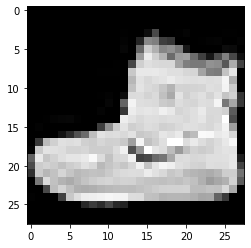

In [3]:
i = 0
plt.imshow(xTrain[i], cmap='gray')

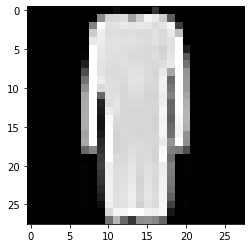

In [4]:
plt.imshow(xTrain[i+25], cmap='gray')

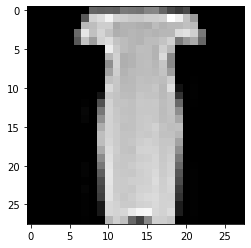

In [5]:
plt.imshow(xTrain[i+51], cmap='gray')

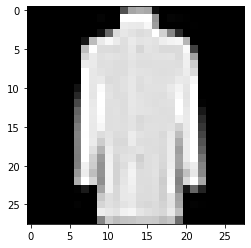

In [6]:
plt.imshow(xTrain[i+75], cmap='gray')

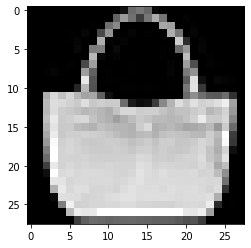

In [7]:
plt.imshow(xTrain[i+100], cmap='gray')

In [8]:
# Pre processing the data
xTrain = xTrain/255.0
xTest = xTest/255.0

In [9]:
xTrain.astype(np.float64)
xTest.astype(np.float64)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
# train validation 90:10 split
train_x, validate_x, train_y, validate_y = train_test_split(xTrain, yTrain, test_size = 0.1)

In [11]:
# Adding batch size and converting using torch
train_x = train_x.reshape(54000, 1, 28, 28)
train_x  = torch.from_numpy(train_x)

train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

In [12]:
train_x.shape, train_y.shape

(torch.Size([54000, 1, 28, 28]), torch.Size([54000]))

In [13]:
# Similarly for the validation set
validate_x = validate_x.reshape(6000, 1, 28, 28)
validate_x  = torch.from_numpy(validate_x)

validate_y = validate_y.astype(int);
validate_y = torch.from_numpy(validate_y)

In [14]:
validate_x.shape, validate_y.shape

(torch.Size([6000, 1, 28, 28]), torch.Size([6000]))

In [15]:
from torch.nn import Module, Sequential, Conv2d, Tanh, AvgPool2d, Linear, CrossEntropyLoss

In [16]:
# Creating a LeNet5 Architecture
class LeNet5Arch(Module):
    def __init__(self):
        super(LeNet5Arch, self).__init__()

        self.cnn_model = Sequential(
            Conv2d(1, 6, kernel_size = 5),
            Tanh(),
            AvgPool2d(2, stride = 2),
            Conv2d(6, 16, kernel_size = 5),
            Tanh(),
            AvgPool2d(2, stride = 2),
        )

        self.fc_model = Sequential(
            Linear(256, 120),
            Tanh(),
            Linear(120, 84),
            Tanh(),
            Linear(84, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [29]:
LeNet5model = LeNet5Arch()

optimizer = optim.Adam(LeNet5model.parameters(), lr=0.005)
criterion = CrossEntropyLoss()
print(LeNet5model)

LeNet5Arch(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [30]:
trainLosses = []
validationLosses = []

In [31]:
def train(epoch):
    LeNet5model.train()
    tr_loss = 0
    xTrain, yTrain = Variable(train_x).to(torch.float32), Variable(train_y).type(torch.LongTensor)
    x_val, y_val = Variable(validate_x).to(torch.float32), Variable(validate_y).type(torch.LongTensor)

    optimizer.zero_grad()

    output_train = LeNet5model(xTrain)
    output_val = LeNet5model(x_val)

    loss_train = criterion(output_train, yTrain)
    loss_val = criterion(output_val, y_val)
    trainLosses.append(loss_train.detach().numpy())
    validationLosses.append(loss_val.detach().numpy())

    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [32]:
# training the network
num_epochs = 25

for epoch in range(num_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.3015, grad_fn=<NllLossBackward0>)
Epoch :  3 	 loss : tensor(2.0752, grad_fn=<NllLossBackward0>)
Epoch :  5 	 loss : tensor(1.5523, grad_fn=<NllLossBackward0>)
Epoch :  7 	 loss : tensor(1.2617, grad_fn=<NllLossBackward0>)
Epoch :  9 	 loss : tensor(1.1164, grad_fn=<NllLossBackward0>)
Epoch :  11 	 loss : tensor(1.0188, grad_fn=<NllLossBackward0>)
Epoch :  13 	 loss : tensor(0.9436, grad_fn=<NllLossBackward0>)
Epoch :  15 	 loss : tensor(0.8897, grad_fn=<NllLossBackward0>)
Epoch :  17 	 loss : tensor(0.8471, grad_fn=<NllLossBackward0>)
Epoch :  19 	 loss : tensor(0.8122, grad_fn=<NllLossBackward0>)
Epoch :  21 	 loss : tensor(0.7703, grad_fn=<NllLossBackward0>)
Epoch :  23 	 loss : tensor(0.7429, grad_fn=<NllLossBackward0>)
Epoch :  25 	 loss : tensor(0.7210, grad_fn=<NllLossBackward0>)


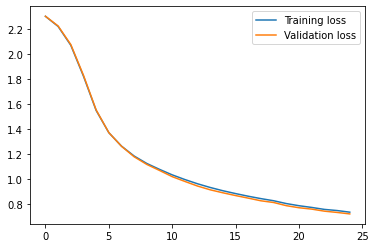

In [33]:
# plotting the training and validation loss

plt.plot(trainLosses, label='Training loss')
plt.plot(validationLosses, label='Validation loss')
plt.legend()
plt.show()

In [34]:
# accuracy on training set
with torch.no_grad():
    output = LeNet5model(train_x.to(torch.float32))

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

Taccuracy = accuracy_score(train_y, predictions)
print('training accuracy', Taccuracy)

training accuracy 0.7216666666666667


In [35]:
# accuracy on validation set
with torch.no_grad():
    output = LeNet5model(validate_x.to(torch.float32))

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)


Vaccuracy = accuracy_score(validate_y, predictions)
print('validation accuracy', Vaccuracy)

validation accuracy 0.7316666666666667


In [36]:
# Test set
test_x = xTest.reshape(10000, 1, 28, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

torch.Size([10000, 1, 28, 28])

In [37]:
with torch.no_grad():
    output = LeNet5model(test_x.to(torch.float32))

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

In [38]:
predictions

array([7, 2, 1, ..., 8, 1, 5])

In [39]:
yTest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [40]:
accuracy_score(yTest, predictions)

0.7196